In [1]:

# What version of Python do you have?
import sys

# import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import keras

# print(f"Tensor Flow Version: {tf.__version__}")
# print(f"Keras Version: {keras.__version__}")
# print()
# print(f"Python {sys.version}")
# print(f"Pandas {pd.__version__}")
# print(f"Scikit-Learn {sk.__version__}")
# print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

ModuleNotFoundError: No module named 'keras'

In [67]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence

import matplotlib.pyplot as plt
import numpy as np
import cv2

import os, json, shutil
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import layers
from tensorflow import keras

import os
import json
import sys

import datetime
import os
import time
import glob 

from itertools import islice

import segmentation_models as sm
sm.set_framework('tf.keras')

sys.path.append(r'D:/Users/juanp/Documents/CCNY/Spring 2021/Neural Networks/Final Project/image-segmentation-keras-master_SM/image-segmentation-keras-master/')

out_train_data_dir = '../../data/interim/Cropped/train'
out_val_data_dir = '../../data/interim/Cropped/test'
# out_test_data_dir = '/home/juanp.montoya/NeuralNetworks/Final_Project/final-project-landandbuildingsatimg-ccny/data/processed/Cropped/test'

same_name_path ='/home/juanp.montoya/NeuralNetworks/Final_Project/final-project-landandbuildingsatimg-ccny/data/processed/'

In [74]:
ima = sorted(glob.glob(out_val_data_dir+'/images/*'))
msk = sorted(glob.glob(out_val_data_dir+'/masks/*'))
for i in range(len(ima)):
#     print(i)
    assert ima[i].split("Train_")[1] == msk[i].split("Mask_")[1]

In [75]:
# i = 4202
print(len(ima), len(msk))
ima[i].split("Train_")[1] , msk[i+0].split("Mask_")[1]

0 0


IndexError: list index out of range

# Changing File names

## Test

In [70]:
direc = "Cropped_same_name\\test\\Images\\"
reading_images = []
reading_masks = []

reading_images = glob.glob(out_val_data_dir+'/images/*')
reading_masks = glob.glob(out_val_data_dir+'/masks/*')

print(reading_images[0:1])
print(reading_masks[0:1])

print(len(reading_images))
print(len(reading_masks))

['../../data/interim/Cropped/test/images/Train_Batch_2_Image_16_Tile_9.png']
['../../data/interim/Cropped/test/masks/Mask_Batch_9_Image_23_Tile_4.png']
2056
2056


In [71]:
name_images = []
for i, r in enumerate(reading_images):
    name_images.append(reading_images[i].split("Train_")[1])
print(name_images[0:1])
print(len(name_images))

['Batch_2_Image_16_Tile_9.png']
2056


In [73]:
for i, filename in enumerate(reading_images):
    os.rename(filename, same_name_path + "Cropped_same_name/test/Images/" + name_images[i])
for i, filename in enumerate(reading_masks):
    os.rename(filename, same_name_path + "Cropped_same_name/test/Masks/" + name_images[i])

In [8]:
# name_images = reading_images[0][26:]
# name_images

## train

In [9]:
# direc = "Cropped_same_name\\train\\Images\\"
# reading_images = []
# reading_masks = []

# reading_images = glob.glob(r'Cropped\train\images\*.png')
# reading_masks = glob.glob(r'Cropped\train\masks\*.png')

# print(reading_images[0:1])
# print(reading_masks[0:1])

# print(len(reading_images))
# print(len(reading_masks))

In [10]:
# name_images = []
# for i, r in enumerate(reading_images):
#     name_images.append(reading_images[i][27:])
# print(name_images[0:1])
# print(len(name_images))

In [11]:
# for i, filename in enumerate(reading_images):
#     os.rename(filename, "Cropped_same_name\\train\\Images\\" + name_images[i])
# for i, filename in enumerate(reading_masks):
#     os.rename(filename, "Cropped_same_name\\train\\Masks\\" + name_images[i])

### Validation

In [12]:
# direc = "Cropped_same_name\\val\\Images\\"
# reading_images = []
# reading_masks = []

# reading_images = glob.glob(r'Cropped\val\images\*.png')
# reading_masks = glob.glob(r'Cropped\val\masks\*.png')

# print(reading_images[0:1])
# print(reading_masks[0:1])

# print(len(reading_images))
# print(len(reading_masks))

In [13]:
# name_images = []
# for i, r in enumerate(reading_images):
#     name_images.append(reading_images[i][25:])
# print(name_images[0:1])
# print(len(name_images))

In [14]:
# for i, filename in enumerate(reading_images):
#     os.rename(filename, "Cropped_same_name\\val\\Images\\" + name_images[i])
# for i, filename in enumerate(reading_masks):
#     os.rename(filename, "Cropped_same_name\\val\\Masks\\" + name_images[i])

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")    
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    
tf.config.set_soft_device_placement(True)

1 Physical GPUs, 1 Logical GPU


# Harold's Model

In [5]:
class DataGenerator(Sequence):
    def __init__(self, list_IDs,label_map , img_dir ,mode):
        'Initialization'
        self.list_IDs = list_IDs
        self.label_map = image_label_map
        self.on_epoch_end()
        self.img_dir = img_dir + "/images"
        self.mask_dir = img_dir + "/masks"
        self.mode = mode

    def __len__(self):
        return int(len(self.list_IDs))

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))    

    
    def __getitem__(self, index):
        'Generate one batch of data'
        indexes = self.indexes[index:(index+1)]
        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        # Generate data
        X, y = self.__data_generation(list_IDs_temp)
        return X, y
    
    
    def __data_generation(self, list_IDs_temp):
        """Generates data containing batch_size samples"""
        if self.mode == "train":
            # Generate data
            X, y = self.load_file(list_IDs_temp)
            return X, y
        elif self.mode == "val":
            X, y = self.load_file(list_IDs_temp)
            return X, y
        
        
    def load_file(self, id_list):
        list_IDs_temp = id_list
        for ID in list_IDs_temp:
            x_file_path = os.path.join(self.img_dir, ID)
            y_file_path = os.path.join(self.mask_dir, self.label_map.get(ID))
            # Store sample
            X = np.load(x_file_path)
            # Store class
            y = np.load(y_file_path)
            ms_he = np.zeros(([32, y.shape[1], y.shape[2], 7]))
            for j in range(y.shape[0]):    
                for i in range(7):
                    ms_he[j,:,:,i][y[j,:,:,0] == i] = 1
        return X,ms_he    

In [5]:
# ====================
# train set
# ====================
all_files = [s for s in os.listdir(out_train_data_dir + "/images/") if s.endswith('.npy')]
all_files.append([s for s in os.listdir(out_train_data_dir + "/masks/") if s.endswith('.npy')] )

image_label_map = {
        "image_file_{}.npy".format(i+1): "label_file_{}.npy".format(i+1)
        for i in range(int(len(all_files)))}
partition = [item for item in all_files if "image_file" in item]

# ====================
# validation set
# ====================

all_val_files = [s for s in os.listdir(out_val_data_dir + "/images/") if s.endswith('.npy')]
all_val_files.append([s for s in os.listdir(out_val_data_dir + "/masks/") if s.endswith('.npy')] )
val_image_label_map = {
        "image_file_{}.npy".format(i+1): "label_file_{}.npy".format(i+1)
        for i in range(int(len(all_val_files)))}
val_partition = [item for item in all_val_files if "image_file" in item]

In [6]:
train_generator = DataGenerator(partition,image_label_map,out_train_data_dir, "train")
val_generator= DataGenerator(val_partition,val_image_label_map,out_val_data_dir, "val")

In [15]:
val_generator[5][0].shape, val_generator[5][1].shape

((32, 512, 512, 3), (32, 512, 512, 7))

In [10]:
ss = glob.glob(out_train_data_dir+'/masks/*')
np.load(ss[0]).shape

(32, 512, 512, 1)

In [47]:
def plot_img_histogram(img_path, size):
    image = np.zeros(([size, 32, 512, 512, 1]))
    for i in range(len(img_path[0:size])):
        im = np.load(img_path[i])
        image[i,:,:,:,:] = im
        print(i)
    fig, ax = plt.subplots()
    ax.hist(image[:,:, :].ravel(), bins = 7, color = 'Blue', alpha = 0.5)
#     plt.hist(image[:, :].ravel(), bins = 7, color = 'Green', alpha = 0.5)
#     plt.hist(image[:, :].ravel(), bins = 7, color = 'Blue', alpha = 0.5)
    ax.set_xlabel('Class')
    ax.set_ylabel('Count')
    ax.set_title('Mask Histogram')
    plt.show()
    
    hist, bins = np.histogram(image[:,:,:].ravel(), bins=[0, 1, 2, 3, 4, 5, 6, 7])
    return fig, ax, hist, bins

In [38]:
len(ss)

257

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157


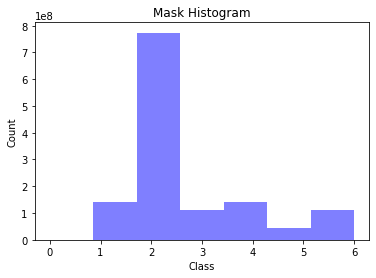


Time Taken for testing: 0:01:31.163365


array([   880649, 141330071, 773653781, 112874663, 139677470,  45204897,
       111778533], dtype=int64)

In [48]:
#     Convert RGB mask to categorical array.
#     urban_land         [0 ,255 ,255]    --> 1
#     agriculture_land   [255 ,255 ,0]    --> 2   
#     rangeland          [255 ,0 ,255]    --> 3
#     forest_land        [0 ,255 ,0]      --> 4
#     water              [0 ,0 ,255]      --> 5
#     barren_land        [255 ,255 ,255]  --> 6
#     unknown            [0 ,0 ,0]        --> 0

from datetime import datetime
start = datetime.now()
 

fig , ax, hist, bins = plot_img_histogram(ss,158)
# fig.savefig('Histogram', dpi = 300)
end = datetime.now()
print("\nTime Taken for testing: %s" % (end-start))
hist

In [50]:
(hist/hist.sum())
# bins

array([0.00066444, 0.10663201, 0.5837134 , 0.08516271, 0.10538514,
       0.03410661, 0.08433569])

(512, 512, 1)

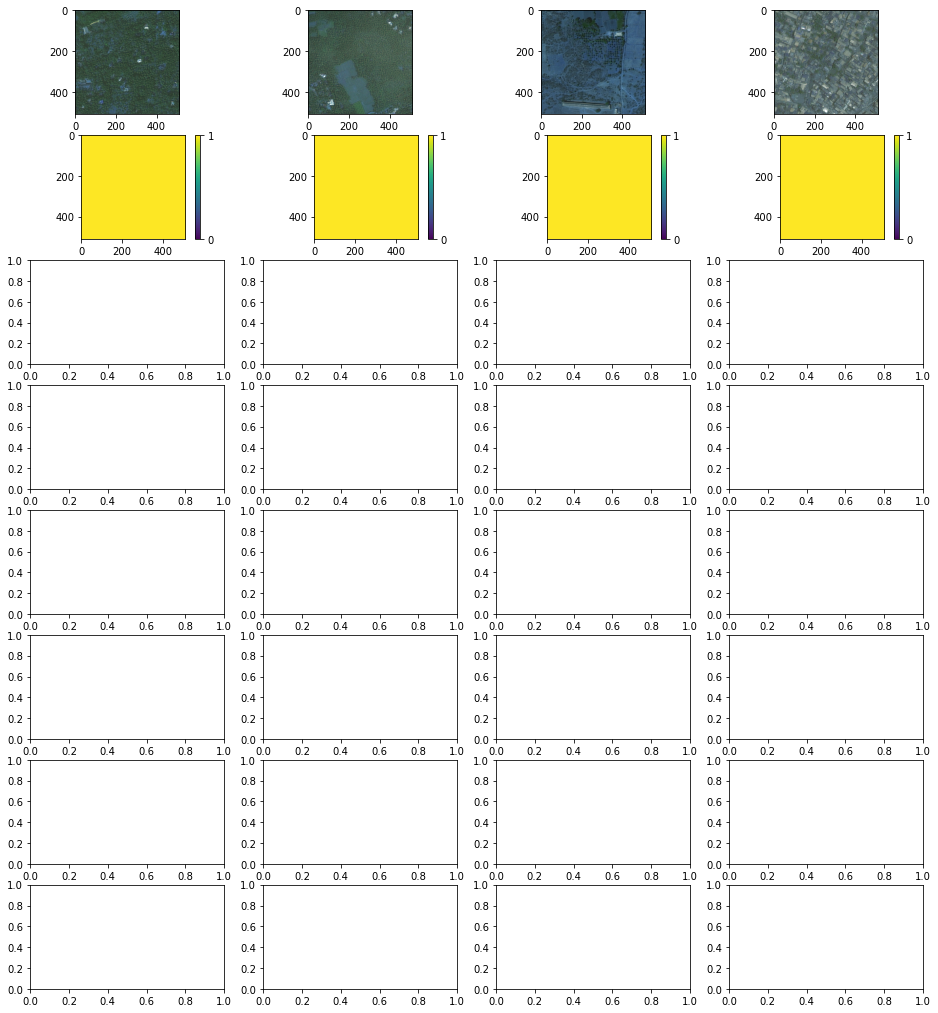

In [12]:
fig, axes = plt.subplots(8, 4, figsize=(16, 18))
# fig.subplots_adjust(hspace=0.1)
batch = 20
for a in np.arange(0,4):
    
    image = train_generator[batch][0][a+5,:,:,:]

    # Load masks
    mask = train_generator[batch][1][a+5,:,:,:]
    axes[0, a].imshow( image)
    
    for i in range(mask.shape[2]):
        r = axes[i+1, a].imshow(mask[:,:,i], vmin = 0, vmax = 1)
        cbar = fig.colorbar(r, ax = axes[i+1, a], ticks=[0,1])
#         d.clim(0,1)
mask.shape

In [4]:
BACKBONE = 'densenet121'
preprocess_input = sm.get_preprocessing(BACKBONE)

In [17]:
BATCH_SIZE = 10
LR = 0.0001
EPOCHS = 5

n_classes = 7  # case for binary and multiclass segmentation
activation = 'sigmoid' if n_classes == 1 else 'softmax'
activation = 'softmax'
#create model
model = sm.Unet(BACKBONE, classes=n_classes, activation=activation,input_shape=(256, 256, 3))

In [18]:
model.summary()

# model = Unet('resnet18', encoder_weights='imagenet',
#                  classes=3,
#                  input_shape=(224, 224, 3))

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 262, 262, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 128, 64) 9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [20]:
# define optomizer
optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
dice_loss = sm.losses.DiceLoss()
# focal_loss = sm.losses.BinaryFocalLoss() if n_classes == 1 else sm.losses.CategoricalFocalLoss()
focal_loss = sm.losses.CategoricalFocalLoss()

total_loss = dice_loss + (1 * focal_loss)

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
model.compile(optim, total_loss, metrics)

# define callbacks for learning rate scheduling and best checkpoints saving
callbacks = [
    keras.callbacks.ModelCheckpoint('best_model_1.h5', save_weights_only=True, save_best_only=True, mode='min'),
    keras.callbacks.ReduceLROnPlateau(),
]



In [8]:
path = 'D:/Users/juanp/Documents/CCNY/Spring 2021/Neural Networks/Final Project/'

input_height = 612
input_width = 612
output_height = 512
output_width = 512

train_images =  path + "Cropped_same_name/train/Images/Images"
train_annotations = path + "Cropped_same_name/train/Masks/Masks"

val_images =  path + "Cropped_same_name/val/Images/Images"
val_annotations = path + "Cropped_same_name/val/Masks/Masks"


In [50]:
glob.glob(train_annotations)

['D:/Users/juanp/Documents/CCNY/Spring 2021/Neural Networks/Final Project/Cropped_same_name/train/Masks']

In [9]:
from image_segmentation.keras_segmentation.data_utils.data_loader import image_segmentation_generator
# from image_segmentation.keras_segmentation import *


In [51]:
visualize_dataset
#  --images_path="dataset1/images_prepped_train/" \
#  --segs_path="dataset1/annotations_prepped_train/"  \
#  --n_classes=50

NameError: name 'visualize_dataset' is not defined

In [22]:
train_gen = image_segmentation_generator(
        train_images, train_annotations,  5,  7,
        input_height, input_width, output_height, output_width,
        )

val_gen = image_segmentation_generator(
            val_images, val_annotations,  5,
            7, input_height, input_width, output_height, output_width,
            )


In [81]:
def my_image_mask_generator(image_data_generator, mask_data_generator):
    train_generator = zip(image_data_generator, mask_data_generator)
    for (img, mask) in train_generator:
        yield (img[0], mask[0])

In [99]:
SEED = 69

image_data_generator = ImageDataGenerator().flow_from_directory(
    train_images, batch_size = BATCH_SIZE, target_size = (512, 512), color_mode="rgb", seed = SEED)

mask_data_generator = ImageDataGenerator().flow_from_directory(
    train_annotations, batch_size = BATCH_SIZE, target_size = (512, 512),color_mode="grayscale", seed = SEED)

my_generator = my_image_mask_generator(image_data_generator, mask_data_generator)

Found 8221 images belonging to 1 classes.
Found 8221 images belonging to 1 classes.


In [89]:
mask_data_generator[0][0].shape

(2, 512, 512, 1)

In [93]:
len(image_data_generator)

4111

In [23]:
import os 
import sys 
from datetime import datetime
    
def main(): 
     
    start = datetime.now()
 

    history = model.fit(train_gen, 
                        steps_per_epoch=800, 
                        epochs=EPOCHS, 
                        callbacks=callbacks,
                        use_multiprocessing=False
                           )


    end = datetime.now()

if __name__ == '__main__': 
    main() 


  ...
    to  
  ['...']
Train for 800 steps
Epoch 1/5
  1/800 [..............................] - ETA: 2:33:20WARNING:tensorflow:Can save best model only with val_loss available, skipping.


ResourceExhaustedError:  OOM when allocating tensor with shape[5,128,38,38] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node model_1/conv4_block24_1_conv/Conv2D (defined at <ipython-input-21-128aef4c2c37>:14) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_distributed_function_77911]

Function call stack:
distributed_function


In [15]:
from datetime import datetime
start = datetime.now()
 

history = model.fit(
    train_generator, 
    steps_per_epoch=len(train_generator), 
    epochs=EPOCHS, 
    callbacks=callbacks, 
    validation_data=val_generator, 
    validation_steps=len(val_generator),
    use_multiprocessing=False
)


end = datetime.now()
print("\nTime Taken for testing: %s" % (end-start))


  ...
    to  
  ['...']
Train for 257 steps
Epoch 1/5
  1/257 [..............................] - ETA: 56:16WARNING:tensorflow:Can save best model only with val_loss available, skipping.


ResourceExhaustedError:  OOM when allocating tensor with shape[32,128,128,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node model_1/conv2_block2_concat/concat (defined at <ipython-input-14-ff307e4d5663>:12) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_distributed_function_40854]

Function call stack:
distributed_function


In [54]:
model.save("../random/model_output5.h5")

In [63]:
def plot_history(history):
       
    acc = history.history['iou_score']
    val_acc = history.history['val_iou_score']
    loss = history.history['loss']
    val_loss = history.history['val_loss'] 
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc)
    plt.plot(val_acc)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.subplot(1, 2, 2)
    plt.plot(loss)
    plt.plot(val_loss)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.show();

In [65]:
plot_history(model.history)

KeyError: 'iou_score'

In [67]:
val_check =  model.predict(val_generator[1][0])

In [74]:
image

array([[64., 63., 56., ..., 56., 51., 55.],
       [48., 59., 54., ..., 48., 50., 49.],
       [54., 68., 51., ..., 53., 56., 54.],
       ...,
       [28., 12., 43., ..., 68., 56., 36.],
       [27., 23., 35., ..., 65., 47., 40.],
       [36., 44., 42., ..., 64., 60., 63.]], dtype=float32)

In [ ]:
fig, axes = plt.subplots(8, 4, figsize=(16, 18))
# fig.subplots_adjust(hspace=0.1)
batch = 20
for a in np.arange(0,4):
    
    image = val_generator[1][0][a + 5 , :,:,:]

    # Load masks
    mask = val_check[a+5,:,:,]
    axes[0, a].imshow( image)
    print(mask.shape)
    for i in range(mask.shape[2]):
        r = axes[i+1, a].imshow(mask[:,:,i], vmin = 0, vmax = 1)
        cbar = fig.colorbar(r, ax = axes[i+1, a], ticks=[0,1])
#         d.clim(0,1)
mask.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 7)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
